In [2]:
from astropy.io import fits
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
from astropy.wcs import WCS
%matplotlib inline

In [3]:
datadir = "../Disk_PNe-spectros"
fitsfile = "NGC7009_f10m.fits"
hdulist = fits.open(os.path.join(datadir, fitsfile))

In [4]:
hdulist.info()

Filename: ../Disk_PNe-spectros/NGC7009_f10m.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     179   (1026, 296)   float32   


In [5]:
hdulist[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1026 / Axis length                                    
NAXIS2  =                  296 / Axis length                                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 1999' / FITS file originator        
EXTEND  =                    F / File may contain extensions                    
DATE    = '2002-01-13T18:34:26' / Date FITS file was generated                  
IRAF-TLM= '16:20:47 (12/01/2002)' / Time of last modification                   
OBJECT  = 'ngc7009 pa79 10m'   / Name of the object observed                    
IMAGEID =                    1 /                                                
DASCHAN =                    1 / Number of readout channel                      
WINNO   =                   

In [6]:


hdu = hdulist[0]



In [7]:
nx, wav0, i0, dwav = [hdulist[0].header[k] for k in ("NAXIS1", "CRVAL1", "CRPIX1", "CD1_1")]
wavelenght = wav0 + (np.arange(nx) - (i0 - 1))*dwav 

In [8]:
wavelenght

array([ 3630.30584219,  3633.61715129,  3636.92846039, ...,  7017.77505067,
        7021.08635977,  7024.39766886])

In [9]:
hdu.data

array([[ -4.17952427e-17,   7.51145046e-17,   2.27359707e-17, ...,
         -4.05814436e-18,   7.51337663e-18,   7.23944667e-18],
       [  1.32084730e-17,  -4.56585045e-18,  -2.60384860e-17, ...,
         -5.61078264e-18,   1.21369187e-19,  -1.11769813e-18],
       [  1.25551508e-17,  -1.07125866e-18,  -5.44526049e-18, ...,
          8.47160664e-18,  -2.35589269e-18,   1.07509491e-18],
       ..., 
       [  2.23533351e-17,  -2.37220626e-17,  -5.90766901e-17, ...,
         -2.40547861e-17,  -2.15739639e-17,  -2.20388129e-17],
       [ -2.08985693e-17,  -5.06504403e-19,  -2.66181890e-17, ...,
         -2.88772259e-17,  -3.16341693e-17,  -3.09372497e-17],
       [ -2.50058420e-17,  -7.79828328e-18,  -9.71655234e-18, ...,
         -4.73923768e-17,  -4.10709534e-17,  -4.43472504e-17]], dtype=float32)

In [17]:
hdu.data[:,0]

array([ -4.17952427e-17,   1.32084730e-17,   1.25551508e-17,
        -5.89139249e-18,   1.79007406e-18,   2.13635172e-18,
         4.42094578e-18,  -8.98513691e-18,   1.62465072e-17,
         1.72415360e-17,   2.99765423e-17,   5.27283552e-18,
        -1.16116854e-18,   2.16096766e-17,   2.51421961e-17,
        -3.40747756e-17,  -5.05745837e-17,  -1.93878993e-17,
         3.88556409e-19,   4.86577613e-17,   2.24112775e-17,
        -3.37993046e-17,  -1.00855270e-17,   8.01069829e-19,
         7.89591044e-18,   1.06542575e-17,   2.49424237e-17,
        -2.14398349e-17,  -3.88186961e-17,   2.09891356e-17,
        -9.43110554e-18,  -4.01980661e-17,  -1.17198109e-17,
        -1.27055199e-17,  -4.65014768e-17,   6.92342033e-17,
         6.67431456e-17,   2.58331194e-18,  -1.87171584e-17,
        -2.43108614e-17,   1.21754187e-17,   1.55811347e-17,
        -1.76955142e-17,   1.02554233e-17,  -2.25222752e-17,
        -3.85797104e-17,   5.59608066e-17,  -3.48124089e-17,
        -2.17565012e-17,

In [25]:
hdu.data.mean(axis=0)

array([  4.37513720e-16,   4.35426683e-16,   4.61878808e-16, ...,
         8.18700092e-17,   7.93554463e-17,   7.90113458e-17], dtype=float32)

TypeError: Invalid dimensions for image data

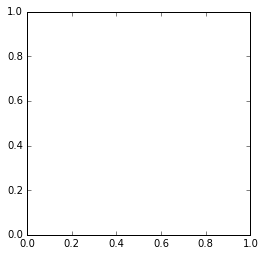

In [16]:
plt.clf()
plt.imshow(hdu.data[1])
plt.colorbar()

In [75]:
image_data = hdulist[0].data

In [76]:
print(type(image_data))
print(image_data.shape)

<type 'numpy.ndarray'>
(296, 1026)


In [35]:
hdulist.close()

In [36]:
image_data = fits.getdata(os.path.join(datadir, fitsfile))

In [37]:
print(type(image_data))
print(image_data.shape)

<type 'numpy.ndarray'>
(296, 1026)


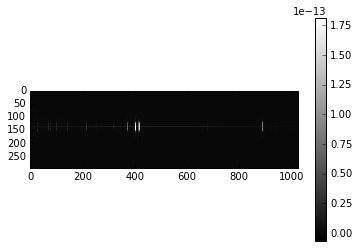

In [38]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

In [39]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

('Min:', -6.5104473e-15)
('Max:', 1.8142111e-13)
('Mean:', 5.5727891e-16)
('Stdev:', 6.4411905e-15)


In [40]:
print(type(image_data.flat))

<type 'numpy.flatiter'>


In [41]:
image_data

array([[ -4.17952427e-17,   7.51145046e-17,   2.27359707e-17, ...,
         -4.05814436e-18,   7.51337663e-18,   7.23944667e-18],
       [  1.32084730e-17,  -4.56585045e-18,  -2.60384860e-17, ...,
         -5.61078264e-18,   1.21369187e-19,  -1.11769813e-18],
       [  1.25551508e-17,  -1.07125866e-18,  -5.44526049e-18, ...,
          8.47160664e-18,  -2.35589269e-18,   1.07509491e-18],
       ..., 
       [  2.23533351e-17,  -2.37220626e-17,  -5.90766901e-17, ...,
         -2.40547861e-17,  -2.15739639e-17,  -2.20388129e-17],
       [ -2.08985693e-17,  -5.06504403e-19,  -2.66181890e-17, ...,
         -2.88772259e-17,  -3.16341693e-17,  -3.09372497e-17],
       [ -2.50058420e-17,  -7.79828328e-18,  -9.71655234e-18, ...,
         -4.73923768e-17,  -4.10709534e-17,  -4.43472504e-17]], dtype=float32)

In [45]:
image_data.mean(axis=0)

array([  4.37513720e-16,   4.35426683e-16,   4.61878808e-16, ...,
         8.18700092e-17,   7.93554463e-17,   7.90113458e-17], dtype=float32)

In [46]:
plt.clf()
plt.imshow(hdu.data[1], origin = 'lower', vmin = -10, vmax = 65)
plt.colorbar()

ValueError: I/O operation on closed file